In [1]:
import pandas as pd

## Self correction w/ error steps and error type

In [ ]:
gemma_corrected = pd.read_csv('../data/responses/gemma3/gemma3-27b_selfcorrected_errorloc.csv')
gemma_corrected['correct'].value_counts()

correct
False    32
True     17
Name: count, dtype: int64

In [3]:
corrected_samples = gemma_corrected[gemma_corrected['correct'] == True]
dist_full = corrected_samples['error_type'].value_counts()
dist_full

error_type
(1.3.1.1 Irrelevant/incorrect variable cited or used)    9
(1.3.1.2 Relevant variable missing)                      4
(1.3.2 Incorrect value of variable cited or used)        3
(1.1.2 Value of a known variable calculated again)       1
Name: count, dtype: int64

## Self correction w/ general error location and error type

In [ ]:
gemma_corrected = pd.read_csv('../data/responses/gemma3/gemma3-27b_selfcorrected_genloc.csv')
gemma_corrected['correct'].value_counts()

correct
False    37
True     12
Name: count, dtype: int64

In [5]:
corrected_samples = gemma_corrected[gemma_corrected['correct'] == True]
dist_genloc = corrected_samples['error_type'].value_counts()
dist_genloc

error_type
(1.3.1.1 Irrelevant/incorrect variable cited or used)    10
(1.3.1.2 Relevant variable missing)                       1
(1.3.2 Incorrect value of variable cited or used)         1
Name: count, dtype: int64

### No error location with error type

In [ ]:
gemma_corrected = pd.read_csv('../data/responses/gemma3/gemma3_selfcorrected_noloc.csv')
gemma_corrected['correct'].value_counts()

correct
False    33
True     16
Name: count, dtype: int64

In [7]:
corrected_samples = gemma_corrected[gemma_corrected['correct'] == True]
dist_noloc = corrected_samples['error_type'].value_counts()
dist_noloc

error_type
(1.3.1.1 Irrelevant/incorrect variable cited or used)    13
(1.3.1.2 Relevant variable missing)                       2
(1.3.2 Incorrect value of variable cited or used)         1
Name: count, dtype: int64

### Baseline - no error location and error type

In [ ]:
gemma_corrected = pd.read_csv('../data/responses/gemma3/gemma3_selfcorrected_baseline.csv')
gemma_corrected['correct'].value_counts()

correct
False    32
True     17
Name: count, dtype: int64

In [9]:
corrected_samples = gemma_corrected[gemma_corrected['correct'] == True]
dist_baseline = corrected_samples['error_type'].value_counts()
dist_baseline

error_type
(1.3.1.1 Irrelevant/incorrect variable cited or used)    15
(1.3.1.2 Relevant variable missing)                       1
(1.3.2 Incorrect value of variable cited or used)         1
Name: count, dtype: int64

### Graphs

In [10]:
results_full = {
    'Irrelevant/incorrect variable cited or used': dist_full.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0),
    'Incorrect value of variable cited or used': dist_full.get('(1.3.2 Incorrect value of variable cited or used)', 0),
    'Relevant variable missing, Intermediate values': dist_full.get('(1.3.1.2 Relevant variable missing)', 0),
    'Value of a known variable calculated again': dist_full.get('(1.1.2 Value of a known variable calculated again)', 0),
    'Unit Inconsistency': dist_full.get('2.1 Unit Inconsistency)', 0),
    'Calculation Error': dist_full.get('2.3 Calculation Error)', 0),
    'Incorrect Value': dist_full.get('(3.3.2 Incorrect value)', 0)
}
results_full

{'Irrelevant/incorrect variable cited or used': np.int64(9),
 'Incorrect value of variable cited or used': np.int64(3),
 'Relevant variable missing, Intermediate values': np.int64(4),
 'Value of a known variable calculated again': np.int64(1),
 'Unit Inconsistency': 0,
 'Calculation Error': 0,
 'Incorrect Value': 0}

In [11]:
results_genloc = {
    'Irrelevant/incorrect variable cited or used': dist_genloc.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0),
    'Incorrect value of variable cited or used': dist_genloc.get('(1.3.2 Incorrect value of variable cited or used)', 0),
    'Relevant variable missing, Intermediate values': dist_genloc.get('(1.3.1.2 Relevant variable missing)', 0),
    'Value of a known variable calculated again': dist_genloc.get('(1.1.2 Value of a known variable calculated again)', 0),
    'Unit Inconsistency': dist_genloc.get('2.1 Unit Inconsistency)', 0),
    'Calculation Error': dist_genloc.get('2.3 Calculation Error)', 0),
    'Incorrect Value': dist_genloc.get('(3.3.2 Incorrect value)', 0)
}

In [12]:
results_noloc = {
    'Irrelevant/incorrect variable cited or used': dist_noloc.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0),
    'Incorrect value of variable cited or used': dist_noloc.get('(1.3.2 Incorrect value of variable cited or used)', 0),
    'Relevant variable missing, Intermediate values': dist_noloc.get('(1.3.1.2 Relevant variable missing)', 0),
    'Value of a known variable calculated again': dist_noloc.get('(1.1.2 Value of a known variable calculated again)', 0),
    'Unit Inconsistency': dist_noloc.get('2.1 Unit Inconsistency)', 0),
    'Calculation Error': dist_noloc.get('2.3 Calculation Error)', 0),
    'Incorrect Value': dist_noloc.get('(3.3.2 Incorrect value)', 0)
}

In [13]:
results_baseline = {
    'Irrelevant/incorrect variable cited or used': dist_baseline.get('(1.3.1.1 Irrelevant/incorrect variable cited or used)', 0),
    'Incorrect value of variable cited or used': dist_baseline.get('(1.3.2 Incorrect value of variable cited or used)', 0),
    'Relevant variable missing, Intermediate values': dist_baseline.get('(1.3.1.2 Relevant variable missing)', 0),
    'Value of a known variable calculated again': dist_baseline.get('(1.1.2 Value of a known variable calculated again)', 0),
    'Unit Inconsistency': dist_baseline.get('2.1 Unit Inconsistency)', 0),
    'Calculation Error': dist_baseline.get('2.3 Calculation Error)', 0),
    'Incorrect Value': dist_baseline.get('(3.3.2 Incorrect value)', 0)
}

In [14]:
gpt_results_all = {
    'Error 1.1': [results_full['Irrelevant/incorrect variable cited or used'], 
                results_genloc['Irrelevant/incorrect variable cited or used'], 
                results_noloc['Irrelevant/incorrect variable cited or used'], 
                results_baseline['Irrelevant/incorrect variable cited or used']],
    'Error 1.2': [results_full['Incorrect value of variable cited or used'], 
                results_genloc['Incorrect value of variable cited or used'], 
                results_noloc['Incorrect value of variable cited or used'], 
                results_baseline['Incorrect value of variable cited or used']],
    'Error 1.3': [results_full['Relevant variable missing, Intermediate values'], 
                results_genloc['Relevant variable missing, Intermediate values'], 
                results_noloc['Relevant variable missing, Intermediate values'], 
                results_baseline['Relevant variable missing, Intermediate values']],
    'Error 2': [results_full['Value of a known variable calculated again'], 
                results_genloc['Value of a known variable calculated again'], 
                results_noloc['Value of a known variable calculated again'], 
                results_baseline['Value of a known variable calculated again']],
    'Error 3.1': [results_full['Unit Inconsistency'], 
                results_genloc['Unit Inconsistency'], 
                results_noloc['Unit Inconsistency'], 
                results_baseline['Unit Inconsistency']],
    'Error 3.2': [results_full['Calculation Error'], 
                    results_genloc['Calculation Error'], 
                    results_noloc['Calculation Error'], 
                    results_baseline['Calculation Error']],
    'Error 4': [results_full['Incorrect Value'], 
                results_genloc['Incorrect Value'], 
                results_noloc['Incorrect Value'], 
                results_baseline['Incorrect Value']]
}

gpt_results_all

{'Error 1.1': [np.int64(9), np.int64(10), np.int64(13), np.int64(15)],
 'Error 1.2': [np.int64(3), np.int64(1), np.int64(1), np.int64(1)],
 'Error 1.3': [np.int64(4), np.int64(1), np.int64(2), np.int64(1)],
 'Error 2': [np.int64(1), 0, 0, 0],
 'Error 3.1': [0, 0, 0, 0],
 'Error 3.2': [0, 0, 0, 0],
 'Error 4': [0, 0, 0, 0]}

In [15]:
methods = ("Error location with Type", "General Error location with Type", 
           "No error location with Type", "No error location and Type")

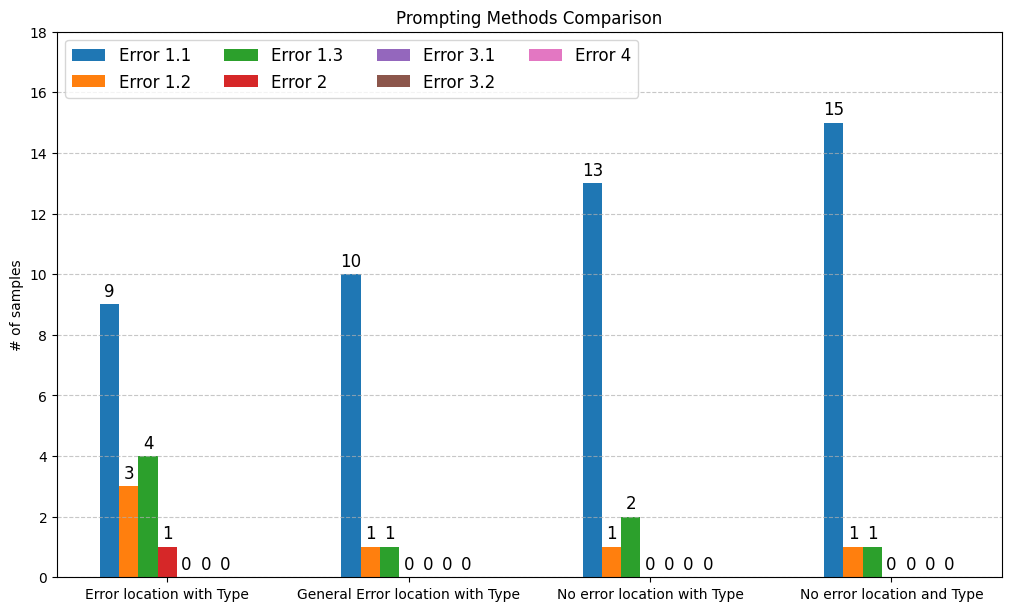

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bar_width = 0.18        
group_gap = 1.0         
num_attributes = len(gpt_results_all)

x_base = np.arange(len(methods)) * (num_attributes * bar_width + group_gap)

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

multiplier = 0 
for attribute, measurement in gpt_results_all.items():
    offset = bar_width * multiplier
    rects = ax.bar(x_base + offset, measurement, bar_width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=12) 
    multiplier += 1 

tick_positions = x_base + (bar_width * num_attributes) / 2 - bar_width / 2

ax.set_ylabel('# of samples')
ax.set_title('Prompting Methods Comparison')
ax.set_xticks(tick_positions, methods) 
ax.legend(loc='upper left', ncols=4, fontsize=12)
ax.set_ylim(0, 18) 

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

output_filename = 'graphs/gemma3-27b_comparisons.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()